# Importing Neccessary Libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

#  Data Exploration and Visualization

### Loading the titanic dataset

In [19]:
tt_data = pd.read_csv("train.csv")

### Inspecting the data

In [20]:
# The rows and column of the data
tt_data.shape

(712, 12)

 .shape method displays the total number of rows and columns in the dataset. It is used to get the shape of the DataFrame. It returns a tuple of two values, the first value is the number of rows and the second value is the number of columns. From this dataset, there are 712 individual row entries and 12 columns.

In [21]:
# Displaying the data information
tt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Name         712 non-null    object 
 3   Sex          712 non-null    object 
 4   Age          575 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Ticket       712 non-null    object 
 8   Fare         712 non-null    float64
 9   Cabin        160 non-null    object 
 10  Embarked     710 non-null    object 
 11  Survived     712 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 66.9+ KB


Used the .info method to get information about the dataframe. This information includes the number of rows and columns, the column names together with their data types and their individual non-null row entries. It also shows the memory usage. The .info() method is useful for getting a quick overview of the structure and content of a dataframe.

In [22]:
# Displaying the top 10 rows
tt_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,693,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S,1
1,482,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S,0
2,528,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S,0
3,856,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S,1
4,802,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.2500,NaN,S,1
5,653,3,"Kalvik, Mr. Johannes Halvorsen",male,21.0,0,0,8475,8.4333,NaN,S,0
6,510,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S,1
7,558,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,NaN,C,0
8,829,3,"McCormack, Mr. Thomas Joseph",male,NaN,0,0,367228,7.7500,NaN,Q,1
9,19,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S,0


### Inspecting the unique values for some categorical data

In [23]:
# Unique values for Sex
tt_data.Sex.unique()

array(['male', 'female'], dtype=object)

In [24]:
# Unique values for Cabin
tt_data.Cabin.unique()

array([nan, 'C95', 'A26', 'C78', 'D15', 'E49', 'C52', 'C104', 'A5',
       'F G73', 'E44', 'B96 B98', 'D30', 'C45', 'G6', 'C70',
       'B57 B59 B63 B66', 'B80', 'F E69', 'C106', 'E8', 'D9', 'E68',
       'D17', 'B58 B60', 'C125', 'B18', 'C83', 'B3', 'F33', 'C92', 'E121',
       'B22', 'E33', 'C23 C25 C27', 'E67', 'B35', 'C85', 'F2', 'E12',
       'A14', 'B86', 'A10', 'D45', 'C47', 'D33', 'D6', 'C91', 'C62 C64',
       'C65', 'B101', 'A7', 'A31', 'D49', 'D11', 'D35', 'E101', 'B69',
       'B102', 'C7', 'C2', 'C124', 'C82', 'B4', 'A34', 'D26', 'C110',
       'A19', 'B42', 'A16', 'B78', 'B94', 'B50', 'E34', 'C99', 'C118',
       'D10 D12', 'E46', 'B39', 'B19', 'C68', 'B37', 'A20', 'B30', 'A24',
       'D56', 'E58', 'E25', 'E36', 'F4', 'T', 'D', 'C126', 'C32',
       'C22 C26', 'E17', 'C90', 'D19', 'E24', 'D47', 'E38', 'B82 B84',
       'B49', 'E50', 'B28', 'C93', 'F G63', 'D21', 'E77', 'C46', 'E10',
       'D20', 'A32', 'C123', 'A23', 'E40', 'B20', 'A36', 'D36', 'B77',
       'B73', 'C54

In [25]:
# Unique values for Embarked
tt_data.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

.unique method is used to get the unique values in a column. It is usually used to get the unique values in a categorical data.

### Statistics for the Numerical features

In [26]:
tt_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,712.000000,712.000000,575.000000,712.000000,712.000000,712.000000,712.000000
mean,444.405899,2.308989,29.807687,0.492978,0.390449,31.819826,0.383427
std,257.465527,0.833563,14.485211,1.060720,0.838134,48.059104,0.486563
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.750000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,439.500000,3.000000,28.500000,0.000000,0.000000,14.454200,0.000000
75%,667.250000,3.000000,39.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


The .describe method is used to get the statistics of the dataset. It returns the following information: 
count(the total number), mean, std(standard deviation), min(minimum value), 25%(25th percentile), 50% (median), 75% (75th percentile), max(maximum value).

### Statistics for the Categorical features

In [27]:
tt_data.describe(include="O")

,Name,Sex,Ticket,Cabin,Embarked
count,712,712,712,160,710
unique,712,2,571,127,3
top,"Bradley, Mr. George (""George Arthur Brayton"")",male,1601,G6,S
freq,1,459,6,4,516


Using the .describe method together with the argument "include='O'" displays the statistics for categorical data usually in the form of an object datatype.

### Relationship between Features

<Axes: xlabel='Survived', ylabel='count'>

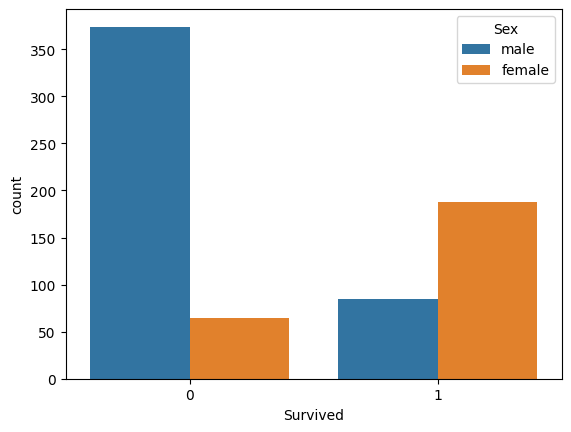

In [28]:
# Relationship between Survived and Sex
sn.countplot(data=tt_data, hue=tt_data["Sex"], x=tt_data["Survived"])

<Axes: xlabel='Survived', ylabel='count'>

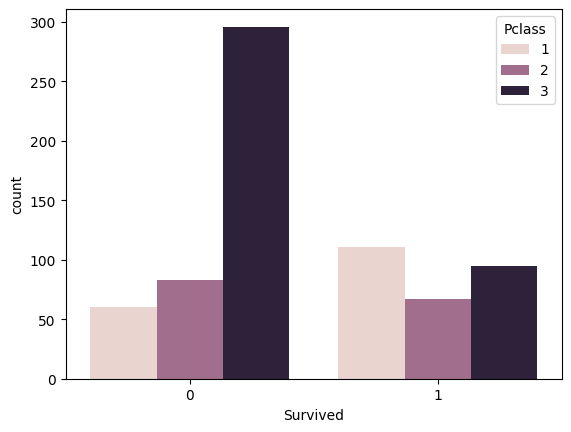

In [29]:
# Relationship between Survived and Class
sn.countplot(data=tt_data, x=tt_data["Survived"], hue=tt_data["Pclass"])

<Axes: xlabel='Survived', ylabel='count'>

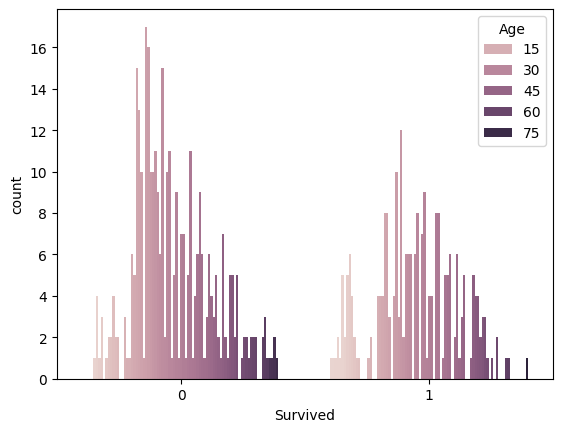

In [30]:
# Relationship between Survived and Age
sn.countplot(data=tt_data, x=tt_data["Survived"], hue=tt_data["Age"])

The relationship between the features is plotted using a countplot. The countplot is a type of bar chart that displays the number of observations in the feature specified. There is also a legend to help identify the different features.

## Data Cleaning and Preprocessing

### Handling Missing Values

In [31]:
# Checking for columns with null values
tt_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            137
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          552
Embarked         2
Survived         0
dtype: int64

Using the .isnull().sum() method, we can count the number of missing values in each column. The output of this method is the name of all columns with their respective number of missing values. With this dataset, Age, Cabin and Embarked are the columns with missing values.